### **Data Ingestion, PDA**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay)
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt


In [2]:
zip_path = r"C:\Users\Perpetual's World\Downloads\wine+quality.zip"
# zip_path = r"C:\Users\ncc666\Downloads\wine+quality.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.printdir()

File Name                                             Modified             Size
winequality-red.csv                            2023-05-22 22:24:00        84199
winequality-white.csv                          2023-05-22 22:24:00       264426
winequality.names                              2023-05-22 22:24:00         3305


In [3]:
with zipfile.ZipFile(zip_path) as z:
  with z.open('winequality-white.csv') as f:
    white_wine = pd.read_csv(f, sep = ";")

In [4]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
white_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
white_wine = white_wine.replace({"quality": {3: "Bad", 4: "Bad", 5: "Average", 6: "Average", 7: "Good", 8: "Good", 9: "Best"}})

In [10]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   object 
dtypes: float64(11), object(1)
memory usage: 459.3+ KB


In [11]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Average
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Average
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Average
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Average
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Average


### **Data Preprocessing**

In [12]:
X = white_wine.drop('quality', axis=1)
y = white_wine.quality

**Scale the features**

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)

**Data splitting**

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Model Training**

In [15]:
models = {
  "LogisticRegressor": LogisticRegression(),
  "LogisticRegressor": LogisticRegression(),
  "RandomForest": RandomForestClassifier(),
  "SVC": SVC(),
  "Decision Tree": DecisionTreeClassifier(),
  "K-Nearest Neighbors": KNeighborsClassifier(),
  "Naive Bayes": GaussianNB() 
}

Traiing LogisticRegressor...


LogisticRegressor Accuracy: 0.7591836734693878


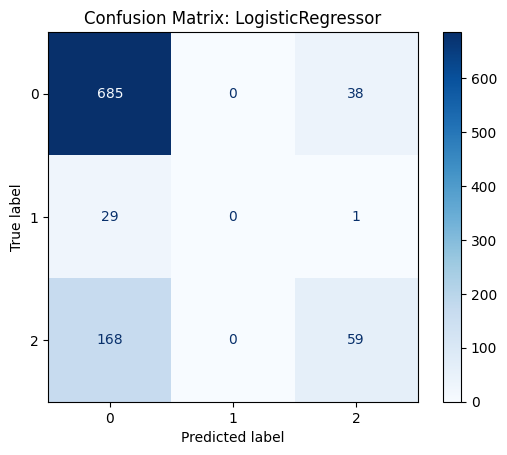

Traiing RandomForest...
RandomForest Accuracy: 0.8622448979591837


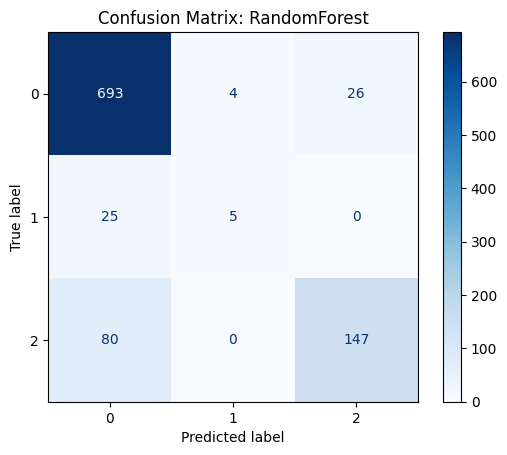

Traiing SVC...
SVC Accuracy: 0.7744897959183673


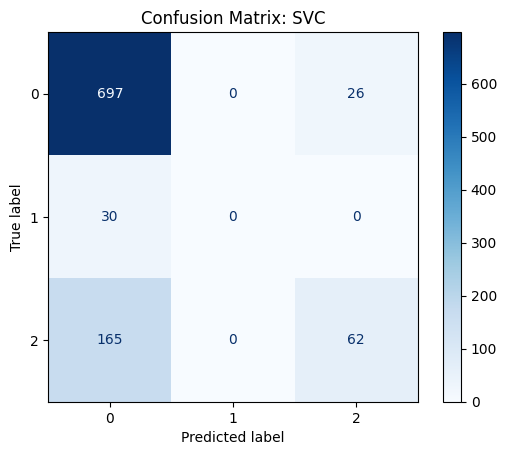

Traiing Decision Tree...
Decision Tree Accuracy: 0.7755102040816326


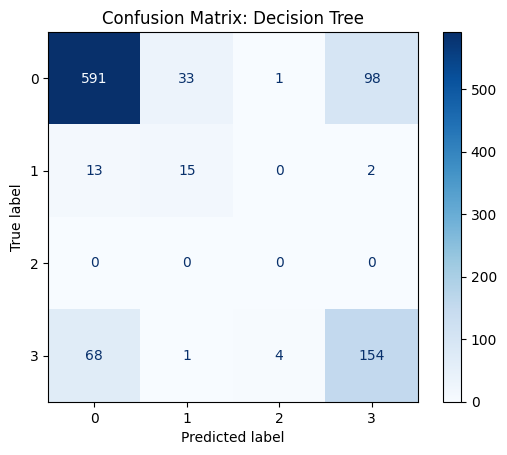

Traiing K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.8020408163265306


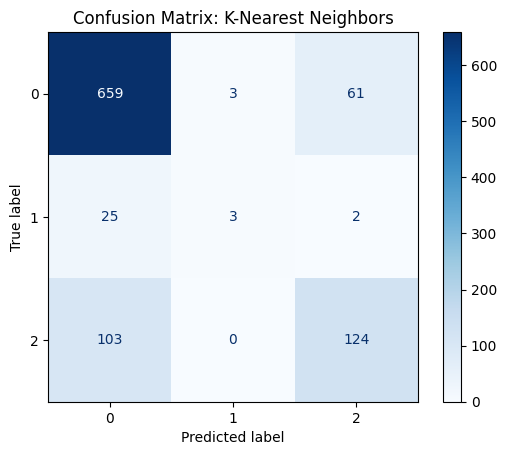

Traiing Naive Bayes...
Naive Bayes Accuracy: 0.6642857142857143


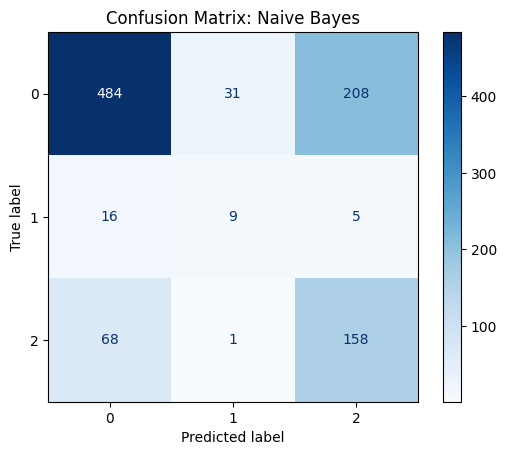

In [16]:
# Initialize a dictionary to store the models
results = {}
for model_name, model in models.items():
  print(f"Traiing {model_name}...")
  model.fit(X_train, y_train)
  # Prediction
  y_pred = model.predict(X_test)

  # Accuracy
  accuracy = accuracy_score(y_test, y_pred)
  results[model_name] = accuracy
  print(f"{model_name} Accuracy: {accuracy}")

  # Let us include confustion matrix
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)

  # Plot with model name as title
  disp.plot(cmap='Blues')
  plt.title(f"Confusion Matrix: {model_name}")
  plt.show()
  


In [17]:
from sklearn.model_selection import RandomizedSearchCV


param_grid = {
    "n_estimators" : [50, 100, 200],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# # lets define GridSearchCV
# grid_search = GridSearchCV(RandomForestClassifier(random_state = 234), param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)
# grid_search.fit(X_train, y_train)
# print(f"Best parameters for Random Forest: {grid_search.best_params_}")

random_search=RandomizedSearchCV(RandomForestClassifier(random_state=234),param_distributions=param_grid,n_iter=10,cv=5,n_jobs=-1,verbose=1,random_state=42)
random_search.fit(X_train,y_train)
print(f"Best parameters for Random Forest: {random_search.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}


In [18]:
# Cross validation score for the best model - Random Forest
from sklearn.model_selection import cross_val_score


Best_model = random_search.best_estimator_
cv_scores = cross_val_score(Best_model, X_scaled, y, cv = 5)
print(f"Cross-validation scores for Random Forest: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Classification report for the best model
y_pred = Best_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division = 1))

Cross-validation scores for Random Forest: [0.77346939 0.75816327 0.80612245 0.76608784 0.74157303]
Mean cross-validation score: 0.7690831960976423

Classification Report:
              precision    recall  f1-score   support

     Average       0.87      0.95      0.91       723
         Bad       0.62      0.17      0.26        30
        Good       0.83      0.65      0.73       227

    accuracy                           0.86       980
   macro avg       0.77      0.59      0.63       980
weighted avg       0.85      0.86      0.85       980



In [19]:
# lets save our best model as a pickle file
import joblib


joblib.dump(Best_model, "best_model.pkl")

# lets save the scaler (MinMaxScaler used for the feature scaling)
joblib.dump(scaler, "scaler.pkl")
print("Model and scaler have been saved successfully.")

Model and scaler have been saved successfully.
